In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fi = pd.read_csv('/content/drive/MyDrive/Basara1.csv')
print(fi.shape)
fi

(10, 9)


,S.No.,DO (mg/L),pH,BOD (mg/L),Turbidity (NTU),COD (mg/L),EC,TSS,Year
0,1,6.30,8.02,1.1,11.0,4,606,17.0,2014
1,2,5.80,7.52,3.0,9.0,20,662,38.0,2015
2,3,7.20,7.87,2.0,25.0,19,436,36.0,2016
3,4,7.30,7.91,3.0,25.0,18,558,15.0,2017
4,5,6.70,7.67,3.0,36.0,21,600,15.0,2018
5,6,7.00,7.31,2.0,18.0,11,486,11.0,2019
6,6,7.30,7.31,2.1,10.0,16,410,9.0,2020
7,7,6.40,7.28,2.1,9.0,20,615,9.0,2021
8,8,6.60,7.72,1.7,7.0,16,747,10.0,2022
9,9,6.97,7.73,3.0,3.4,34,791,6.1,2023


In [ ]:
cols = list(fi)[1:8]
print(cols)

['DO (mg/L)', 'pH', 'BOD (mg/L)', 'Turbidity (NTU)', 'COD (mg/L)', 'EC', 'TSS']


<Axes: >

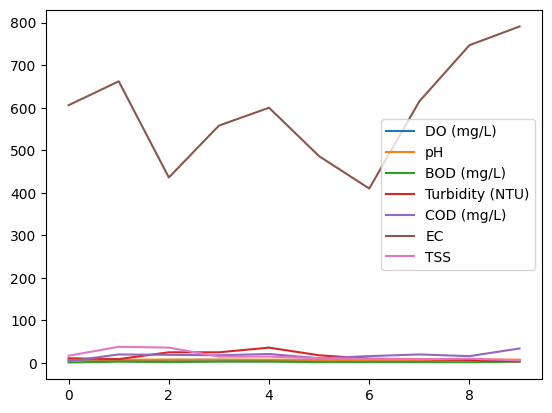

In [ ]:
df_for_training = fi[cols].astype(float)
df_for_training.plot()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training

,DO (mg/L),pH,BOD (mg/L),Turbidity (NTU),COD (mg/L),EC,TSS
0,6.30,8.02,1.1,11.0,4.0,606.0,17.0
1,5.80,7.52,3.0,9.0,20.0,662.0,38.0
2,7.20,7.87,2.0,25.0,19.0,436.0,36.0
3,7.30,7.91,3.0,25.0,18.0,558.0,15.0
4,6.70,7.67,3.0,36.0,21.0,600.0,15.0
5,7.00,7.31,2.0,18.0,11.0,486.0,11.0
6,7.30,7.31,2.1,10.0,16.0,410.0,9.0
7,6.40,7.28,2.1,9.0,20.0,615.0,9.0
8,6.60,7.72,1.7,7.0,16.0,747.0,10.0
9,6.97,7.73,3.0,3.4,34.0,791.0,6.1


In [ ]:
n_future = 1
n_past = 3

In [ ]:
trainX = []
trainYP = []
trainYN = []
trainYS = []
trainYA = []
trainYB = []
trainYC = []
trainYD = []

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
  trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
  trainYP.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
  trainYN.append(df_for_training_scaled[i + n_future - 1:i + n_future, 1])
  trainYS.append(df_for_training_scaled[i + n_future - 1:i + n_future, 2])
  trainYA.append(df_for_training_scaled[i + n_future - 1:i + n_future, 3])
  trainYB.append(df_for_training_scaled[i + n_future - 1:i + n_future, 4])
  trainYC.append(df_for_training_scaled[i + n_future - 1:i + n_future, 5])
  trainYD.append(df_for_training_scaled[i + n_future - 1:i + n_future, 6])


In [ ]:
trainX, trainYP, trainYN, trainYS,trainYA,trainYB,trainYC,trainYD= np.array(trainX), np.array(trainYP), np.array(trainYN), np.array(trainYS),np.array(trainYA),np.array(trainYB),np.array(trainYC),np.array(trainYD)
print('trainX shape == {}.'.format(trainX.shape))
print('trainYP shape == {}.'.format(trainYP.shape))
print('trainYN shape == {}.'.format(trainYN.shape))
print('trainYS shape == {}.'.format(trainYS.shape))
print('trainYA shape == {}.'.format(trainYA.shape))
print('trainYB shape == {}.'.format(trainYB.shape))
print('trainYC shape == {}.'.format(trainYC.shape))
print('trainYD shape == {}.'.format(trainYD.shape))

trainX shape == (7, 3, 7).
trainYP shape == (7, 1).
trainYN shape == (7, 1).
trainYS shape == (7, 1).
trainYA shape == (7, 1).
trainYB shape == (7, 1).
trainYC shape == (7, 1).
trainYD shape == (7, 1).


In [ ]:
list1=[]

In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYP.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 3, 64)             18432     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

history = modelP.fit(trainX, trainYP, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 10s 751ms/step - loss: 0.6098 - val_loss: 0.1971
Epoch 2/50
2/2 [==============================] - 0s 93ms/step - loss: 0.5976 - val_loss: 0.1963
Epoch 3/50
2/2 [==============================] - 0s 74ms/step - loss: 0.5813 - val_loss: 0.1950
Epoch 4/50
2/2 [==============================] - 0s 57ms/step - loss: 0.5865 - val_loss: 0.1951
Epoch 5/50
2/2 [==============================] - 0s 107ms/step - loss: 0.5697 - val_loss: 0.1958
Epoch 6/50
2/2 [==============================] - 0s 111ms/step - loss: 0.5666 - val_loss: 0.1985
Epoch 7/50
2/2 [==============================] - 0s 125ms/step - loss: 0.5539 - val_loss: 0.2012
Epoch 8/50
2/2 [==============================] - 0s 63ms/step - loss: 0.5495 - val_loss: 0.2031
Epoch 9/50
2/2 [==============================] - 0s 76ms/step - loss: 0.5561 - val_loss: 0.2058
Epoch 10/50
2/2 [==============================] - 0s 111ms/step - loss: 0.5098 - val_loss: 0.2078
Epoch 11/50
2/2 [======

In [ ]:
historyP = history

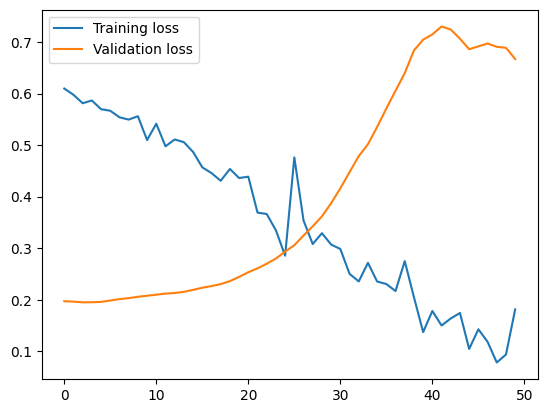

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionP = modelP.predict(trainX)

1/1 [==============================] - 1s 629ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
print(y_pred_futureP)

[7.3257647 6.863125  7.0959435 7.2410264 6.614979  6.484008  6.589517 ]


In [ ]:
print(y_pred_futureP[-1])
i=y_pred_futureP[-1]
do=((i)*100/9)*0.3723
do

6.589517


27.2586358054479

In [ ]:
modelN = Sequential()
modelN.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelN.add(LSTM(32, activation='relu', return_sequences=False))
modelN.add(Dropout(0.2))
modelN.add(Dense(trainYN.shape[1]))

In [ ]:
modelN.compile(optimizer='adam', loss='mse')
modelN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 3, 64)             18432     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyN = modelN.fit(trainX, trainYN, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 13s 753ms/step - loss: 1.0659 - val_loss: 0.1402
Epoch 2/50
2/2 [==============================] - 0s 84ms/step - loss: 1.0599 - val_loss: 0.1428
Epoch 3/50
2/2 [==============================] - 0s 100ms/step - loss: 1.0293 - val_loss: 0.1444
Epoch 4/50
2/2 [==============================] - 0s 74ms/step - loss: 1.0058 - val_loss: 0.1460
Epoch 5/50
2/2 [==============================] - 0s 103ms/step - loss: 0.9969 - val_loss: 0.1464
Epoch 6/50
2/2 [==============================] - 0s 87ms/step - loss: 0.9980 - val_loss: 0.1467
Epoch 7/50
2/2 [==============================] - 0s 166ms/step - loss: 0.9806 - val_loss: 0.1469
Epoch 8/50
2/2 [==============================] - 0s 82ms/step - loss: 0.9482 - val_loss: 0.1479
Epoch 9/50
2/2 [==============================] - 0s 53ms/step - loss: 0.9576 - val_loss: 0.1489
Epoch 10/50
2/2 [==============================] - 0s 122ms/step - loss: 0.9229 - val_loss: 0.1515
Epoch 11/50
2/2 [======

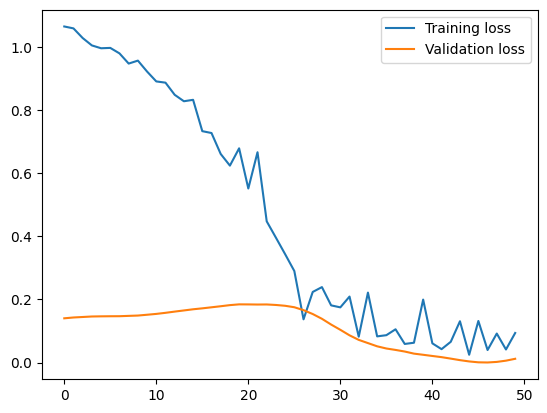

In [ ]:
plt.plot(historyN.history['loss'], label='Training loss')
plt.plot(historyN.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionN = modelN.predict(trainX)

1/1 [==============================] - 0s 445ms/step


In [ ]:
prediction_copiesN = np.repeat(predictionN, df_for_training.shape[1], axis=-1)
y_pred_futureN = scaler.inverse_transform(prediction_copiesN)[:,1]

In [ ]:
print(y_pred_futureN)

[7.872804  7.665623  7.330617  7.265059  7.338665  7.6964183 7.7575893]


In [ ]:
print(y_pred_futureN[-1])
i=y_pred_futureN[-1]
ph=((i-7)*100/1.5)*0.1176

7.7575893


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYS.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 3, 64)             18432     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 3, 64)             18432     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 425ms/step - loss: 0.6819 - val_loss: 1.3021
Epoch 2/50
2/2 [==============================] - 0s 37ms/step - loss: 0.6562 - val_loss: 1.3137
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 0.6233 - val_loss: 1.3212
Epoch 4/50
2/2 [==============================] - 0s 37ms/step - loss: 0.6114 - val_loss: 1.3297
Epoch 5/50
2/2 [==============================] - 0s 47ms/step - loss: 0.6006 - val_loss: 1.3430
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5747 - val_loss: 1.3601
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.5639 - val_loss: 1.3739
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5619 - val_loss: 1.3894
Epoch 9/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5632 - val_loss: 1.4083
Epoch 10/50
2/2 [==============================] - 0s 38ms/step - loss: 0.5546 - val_loss: 1.4295
Epoch 11/50
2/2 [===========

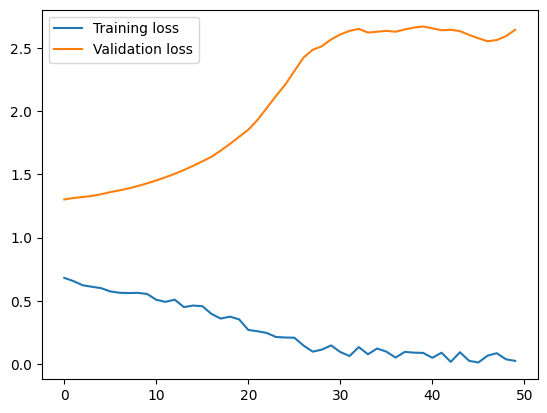

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 0s 300ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)

[3.0308793 2.926047  2.1030834 2.082362  1.9690411 1.7766713 1.9690168]


In [ ]:
i=y_pred_futureS[-1]
bod=(i*100/25)*0.3723
print(i)

1.9690168


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYA.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 3, 64)             18432     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 436ms/step - loss: 0.6238 - val_loss: 1.2444
Epoch 2/50
2/2 [==============================] - 0s 37ms/step - loss: 0.5957 - val_loss: 1.2507
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.6075 - val_loss: 1.2534
Epoch 4/50
2/2 [==============================] - 0s 39ms/step - loss: 0.5669 - val_loss: 1.2560
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5540 - val_loss: 1.2635
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5621 - val_loss: 1.2730
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5217 - val_loss: 1.2836
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5340 - val_loss: 1.2997
Epoch 9/50
2/2 [==============================] - 0s 36ms/step - loss: 0.5149 - val_loss: 1.3119
Epoch 10/50
2/2 [==============================] - 0s 45ms/step - loss: 0.4931 - val_loss: 1.3275
Epoch 11/50
2/2 [===========

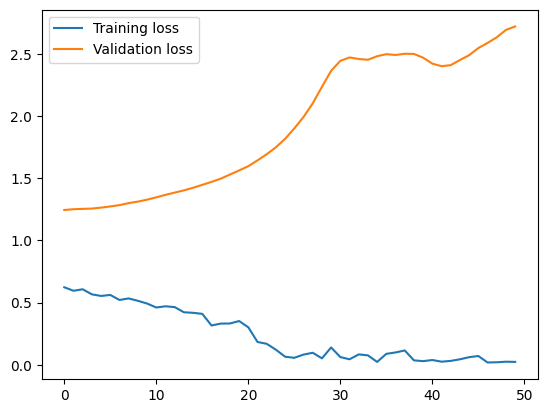

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 0s 314ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)

[2.9455237 2.911265  2.113101  2.065123  1.9718626 1.7566874 1.9545598]


In [ ]:
i=y_pred_futureS[-1]
tur=(i*100/5)*0.1
print(tur)

3.9091196060180664


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYB.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 3, 64)             18432     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 414ms/step - loss: 0.6218 - val_loss: 1.1608
Epoch 2/50
2/2 [==============================] - 0s 37ms/step - loss: 0.6086 - val_loss: 1.1800
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.6043 - val_loss: 1.1969
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.5930 - val_loss: 1.2125
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5908 - val_loss: 1.2316
Epoch 6/50
2/2 [==============================] - 0s 52ms/step - loss: 0.5711 - val_loss: 1.2477
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.5506 - val_loss: 1.2603
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.5443 - val_loss: 1.2734
Epoch 9/50
2/2 [==============================] - 0s 40ms/step - loss: 0.5264 - val_loss: 1.2849
Epoch 10/50
2/2 [==============================] - 0s 36ms/step - loss: 0.5001 - val_loss: 1.2971
Epoch 11/50
2/2 [===========

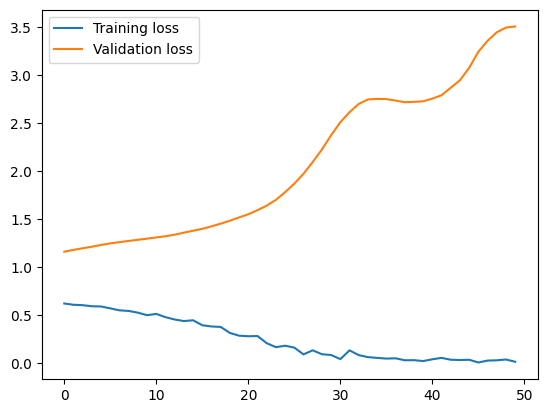

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 0s 293ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)
i=y_pred_futureS[-1]
cod=(i*100/10)*0.12
print(cod)

[3.0583582 3.0484605 2.0364883 2.0676725 1.9523351 1.6285262 1.8129008]
2.1754809379577638


In [ ]:
l=[do,ph,bod,tur,cod]
print(l)
print(sum(l))

[27.2586358054479, 5.939500427246093, 2.93225980424881, 3.9091196060180664, 2.1754809379577638]
42.21499658091863


In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYC.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 3, 64)             18432     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = modelP.fit(trainX, trainYP, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 649ms/step - loss: 0.6204 - val_loss: 0.2340
Epoch 2/50
2/2 [==============================] - 0s 60ms/step - loss: 0.6006 - val_loss: 0.2347
Epoch 3/50
2/2 [==============================] - 0s 78ms/step - loss: 0.5984 - val_loss: 0.2352
Epoch 4/50
2/2 [==============================] - 0s 53ms/step - loss: 0.6101 - val_loss: 0.2352
Epoch 5/50
2/2 [==============================] - 0s 54ms/step - loss: 0.5696 - val_loss: 0.2372
Epoch 6/50
2/2 [==============================] - 0s 69ms/step - loss: 0.5797 - val_loss: 0.2393
Epoch 7/50
2/2 [==============================] - 0s 55ms/step - loss: 0.5599 - val_loss: 0.2406
Epoch 8/50
2/2 [==============================] - 0s 53ms/step - loss: 0.5459 - val_loss: 0.2416
Epoch 9/50
2/2 [==============================] - 0s 73ms/step - loss: 0.5355 - val_loss: 0.2427
Epoch 10/50
2/2 [==============================] - 0s 64ms/step - loss: 0.5612 - val_loss: 0.2449
Epoch 11/50
2/2 [===========

In [ ]:
historyP = history

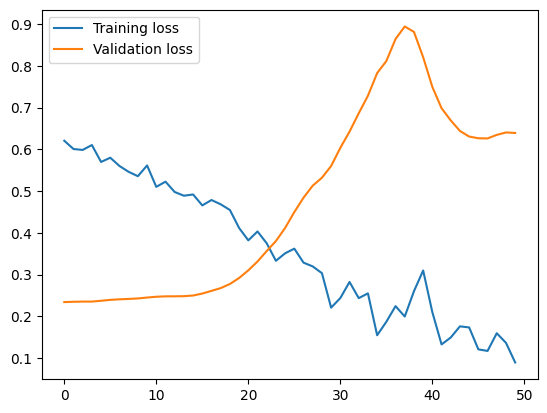

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionP = modelP.predict(trainX)

1/1 [==============================] - 0s 332ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
print(y_pred_futureP)
i=y_pred_futureP[-1]
ec=((i)/300)*0.0033
print(ec)

[7.2707605 6.8746333 7.0719585 7.1813197 6.614965  6.501031  6.597576 ]
7.257333755493164e-05


In [ ]:
l=[do,ph,bod,tur,cod,ec]
print(l)
WQI=sum(l)
print(sum(l))

[27.2586358054479, 5.939500427246093, 2.93225980424881, 3.9091196060180664, 2.1754809379577638, 7.257333755493164e-05]
42.215069154256184


In [ ]:
def get_WQI_bucket(x):
    if x>=0 and x <= 25:
        return "Excellent"
    elif x>=26 and x<=50:
        return "Good"
    elif x >=51 and x<=75:
        return "Poor"
    elif x>=76 and x<100:
        return "Very Poor"
    else:
        return "Not Suitable for drinking"
result=get_WQI_bucket(WQI)
print(result)


Good
